In [33]:
import os
from pathlib import Path
import torch
import matplotlib.pyplot as plt
from diffusion.model import Model

In [34]:
MODEL_PATH = Path("../model")

In [35]:
model = Model()
model.load_state_dict(torch.load(MODEL_PATH.joinpath(os.listdir(MODEL_PATH, )[-1])))

<All keys matched successfully>

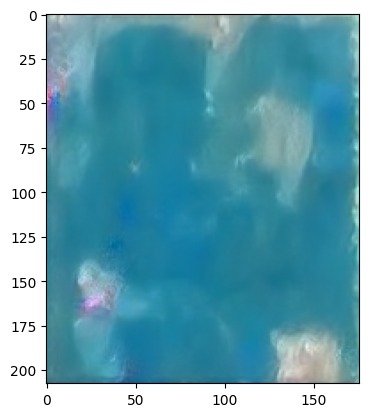

In [36]:
img = model.infer(3, 208, 176)
plt.imshow(img)